In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Author: Nguyen Hoang Nhat Tan (210129) + Nguyen Chinh Quan (220066) + Luu Ha Minh Khoi (220056)
- WS4

In [2]:
data = pd.read_csv("/content/marketing-campaign.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
type(data.Income)

pandas.core.series.Series

Question 1:

In [4]:
dataIncome = data['Income']
dataIncome.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [5]:
Q1 = 35303
Q3 = 68522
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
meanIncome = dataIncome.mean()
stdIncome = dataIncome.std()

In [6]:
IQR, upper, lower

(33219, 118350.5, -14525.5)

Extreme incomes (outliers):

In [7]:
dataIncome[(dataIncome > upper) | (dataIncome < lower)]

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

Z-scores:

In [8]:
(dataIncome[(dataIncome > upper) | (dataIncome < lower)] - meanIncome)/stdIncome

164      4.170954
617      4.375697
655      4.039107
687      4.312375
1300     4.190419
1653     4.167101
2132     4.158282
2233    24.407773
Name: Income, dtype: float64

Question 2:

Before cleaning:

<Axes: >

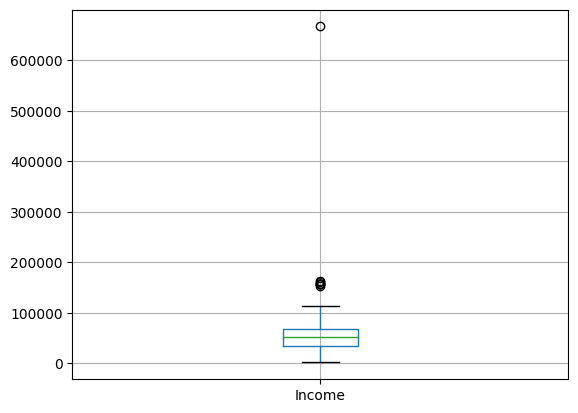

In [9]:
pd.DataFrame(dataIncome).boxplot()

After cleaning:

<Axes: >

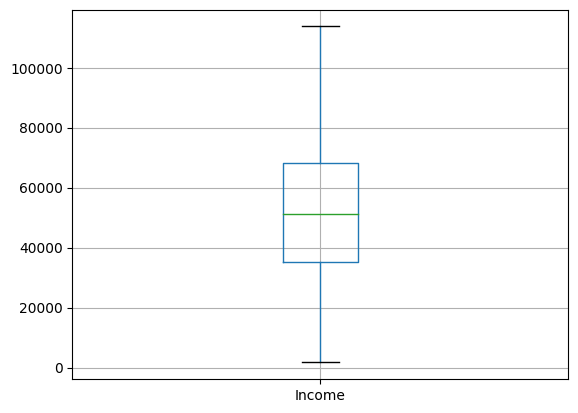

In [10]:
pd.DataFrame(dataIncome[(dataIncome <= upper) & (dataIncome >= lower)]).boxplot()

Question 3:

<Axes: >

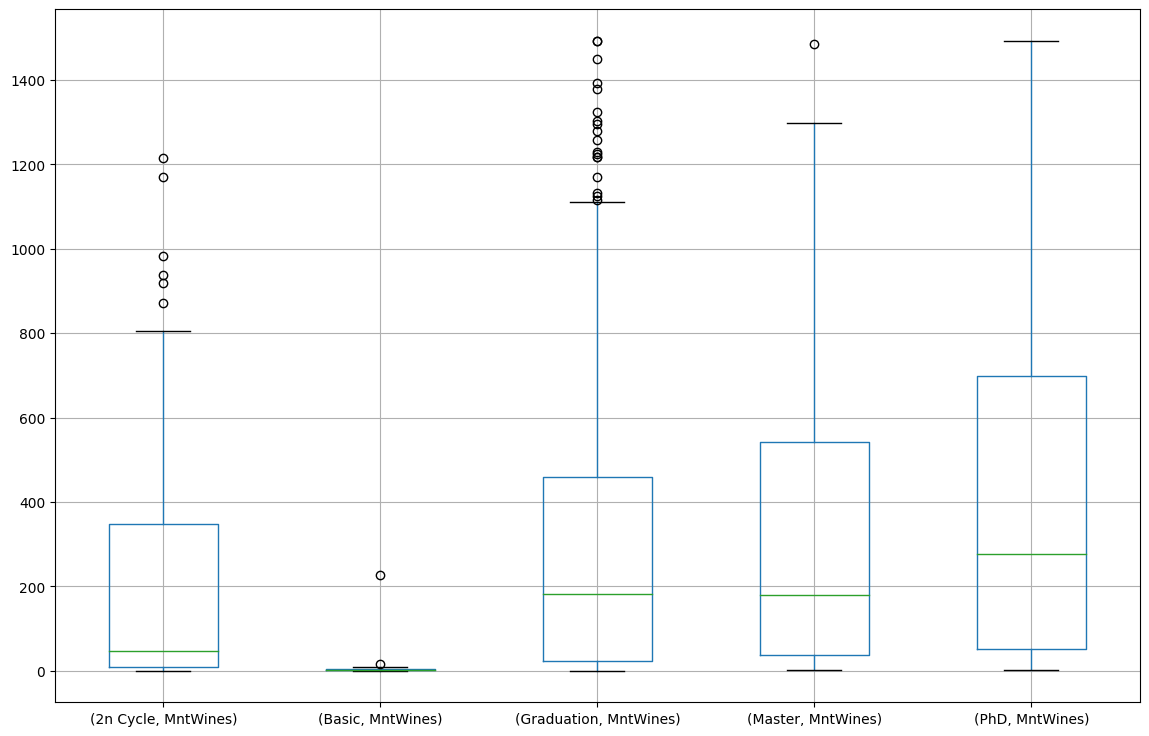

In [11]:
data[['Education', 'MntWines']].groupby('Education').boxplot(figsize = (14, 9), subplots = False)

2n Cycle       Axes(0.1,0.77069;0.8x0.12931)
Basic         Axes(0.1,0.615517;0.8x0.12931)
Graduation    Axes(0.1,0.460345;0.8x0.12931)
Master        Axes(0.1,0.305172;0.8x0.12931)
PhD               Axes(0.1,0.15;0.8x0.12931)
dtype: object

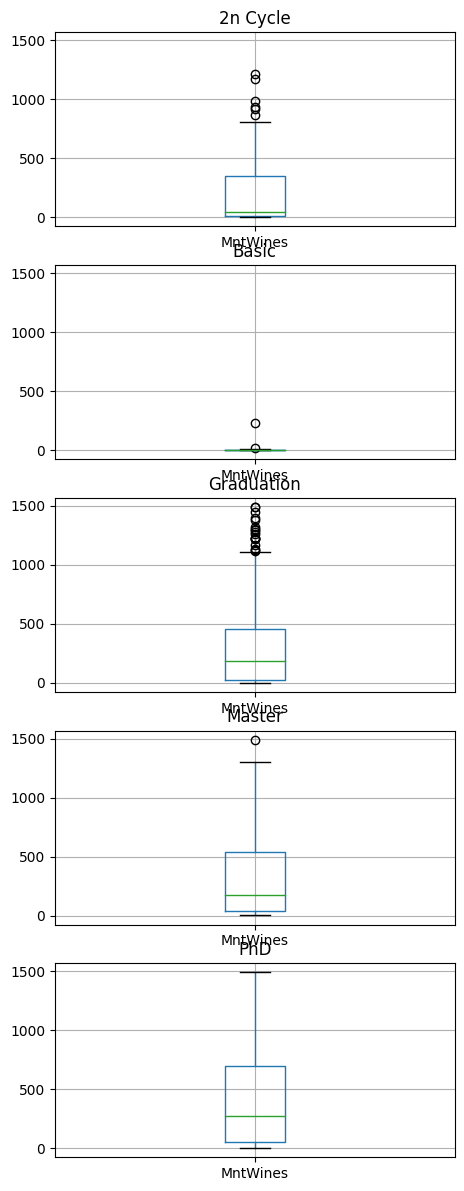

In [12]:
data[['Education', 'MntWines']].groupby('Education').boxplot(figsize = (5, 15), subplots = True, layout = (5, 1))

In [13]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

- It seems that the group with Basic education does not comsume much Wines.
- The variability is largest in the group of Phd.
- If we compare the median, then the PhD median is the largest.

Question 4:

In [14]:
for i in range(-3, 4, 1):
    temp = meanIncome + i*stdIncome
    print('%d std from mean:' % (i), temp)

-3 std from mean: -23271.978628913603
-2 std from mean: 1901.0980319878072
-1 std from mean: 27074.17469288921
0 std from mean: 52247.25135379061
1 std from mean: 77420.32801469202
2 std from mean: 102593.40467559343
3 std from mean: 127766.48133649482


In [15]:
len(dataIncome[(dataIncome >= -23271.978628913603) & (dataIncome <= 127766.48133649482)])/len(data)
# We see that 0.99 > 0.89

0.9857142857142858

In [16]:
len(dataIncome[(dataIncome >= 1901.0980319878072) & (dataIncome <= 102593.40467559343)])/len(data)
# We see that 0.98 > 0.75

0.9839285714285714

In [17]:
dataWines = data['MntWines']
meanWines = dataWines.mean()
stdWines = dataWines.std()

In [18]:
for i in range(-3, 4, 1):
    temp = meanWines + i*stdWines
    print('%d std from mean:' % (i), temp)

-3 std from mean: -705.856463530401
-2 std from mean: -369.2590709250293
-1 std from mean: -32.66167831965748
0 std from mean: 303.9357142857143
1 std from mean: 640.5331068910862
2 std from mean: 977.1304994964579
3 std from mean: 1313.7278921018296


In [19]:
len(dataWines[(dataWines >= -705.856463530401) & (dataWines <= 1313.7278921018296)])/len(data)
# We see that 0.99 > 0.89

0.9928571428571429

In [20]:
len(dataWines[(dataWines >= -369.2590709250293) & (dataWines <= 977.1304994964579)])/len(data)
# We see that 0.94 > 0.75

0.9428571428571428

- Chebyshev's rule validated.